In [11]:
import torch
import torch.nn.functional as F

In [4]:
names =[]
with open("data/dinos.txt", "r") as file:
    names = file.readlines()
names = [name.strip().lower() for name in names]
chars = sorted(set(['.']+[c for name in names for c in name]))
print(chars)
char_to_ix = {c:i for i, c in enumerate(chars)}
ix_to_char = {i:c for i, c in enumerate(chars)}

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [5]:
def chartoi(c):
    return char_to_ix[c]
    
def itochar(i):
    return ix_to_char[i]

In [23]:
def create_dataset(data_names, context_length=3):
    X = []
    Y = []
    for name in data_names:
        context = [0] * context_length
        for ch in name + ".":
            X.append(context)
            ix = chartoi(ch)
            Y.append(ix)
            context = context[1:] +[ix]
    X = torch.tensor(X) 
    Y = torch.tensor(Y)            
    return X, Y

In [26]:
def print_data_set(X, Y):
    for x, y in zip(X, Y):
        string = str([itochar(i.item()) for i in x])
        result = itochar(y.item())
        print(f"{string}->{result}")

In [27]:
X_ex, Y_ex = create_dataset(["abcd"],4)
print(X_ex.shape)
print(X_ex, Y_ex)
print_data_set(X_ex, Y_ex)

torch.Size([5, 3])
tensor([[0, 0, 0],
        [0, 0, 1],
        [0, 1, 2],
        [1, 2, 3],
        [2, 3, 4]]) tensor([1, 2, 3, 4, 0])
['.', '.', '.']->a
['.', '.', 'a']->b
['.', 'a', 'b']->c
['a', 'b', 'c']->d
['b', 'c', 'd']->.


In [92]:
context_lenght = 5
X,Y = create_dataset(names, context_lenght)
print(X[3],Y[3])


tensor([0, 0, 1, 1, 3]) tensor(8)


In [132]:

from model.sequential import Sequential
from layers.linear import Linear, Tanh, BatchNorm1d
from layers.embedding import Embedding

%load_ext autoreload
%autoreload 2
embedding_size = 4
model = Sequential([
    Embedding(len(chars), embedding_size),
    BatchNorm1d(context_lenght * embedding_size),
    Linear(context_lenght * embedding_size, 100),
    Tanh(),
    BatchNorm1d(100),
    Linear(100, 100),
    Tanh(),
    BatchNorm1d(100),
    Linear(100, len(chars))
])
with torch.no_grad():
  model.layers[-1].weight *= 0.1
print(model.get_total_parameters())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
15475


In [ ]:

model.optimize(X, Y, batch_size=32,num_itenration=100000,print_loss_iter=10000, lr=0.008)

      0/ 100000: 3.2975
  10000/ 100000: 1.7780
  20000/ 100000: 1.4211
  30000/ 100000: 1.9387
  40000/ 100000: 1.9222
  50000/ 100000: 1.6160
  60000/ 100000: 1.1665
  70000/ 100000: 1.6719
  80000/ 100000: 1.2950
  90000/ 100000: 1.1199


tensor([[0.5190, 0.5176, 0.5157,  ..., 0.4871, 0.4786, 0.4242],
        [0.4100, 0.3959, 0.4475,  ..., 0.3688, 0.4042, 0.4040],
        [0.3902, 0.3809, 0.4395,  ..., 0.4255, 0.4232, 0.3824],
        ...,
        [0.3634, 0.3629, 0.3580,  ..., 0.3659, 0.3899, 0.3656],
        [0.3049, 0.3227, 0.3307,  ..., 0.4464, 0.4524, 0.3350],
        [0.4266, 0.3590, 0.3774,  ..., 0.3480, 0.4175, 0.4198]])


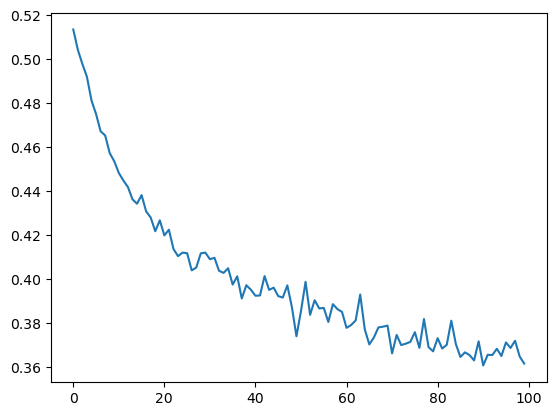

In [131]:
model.plot_loss()

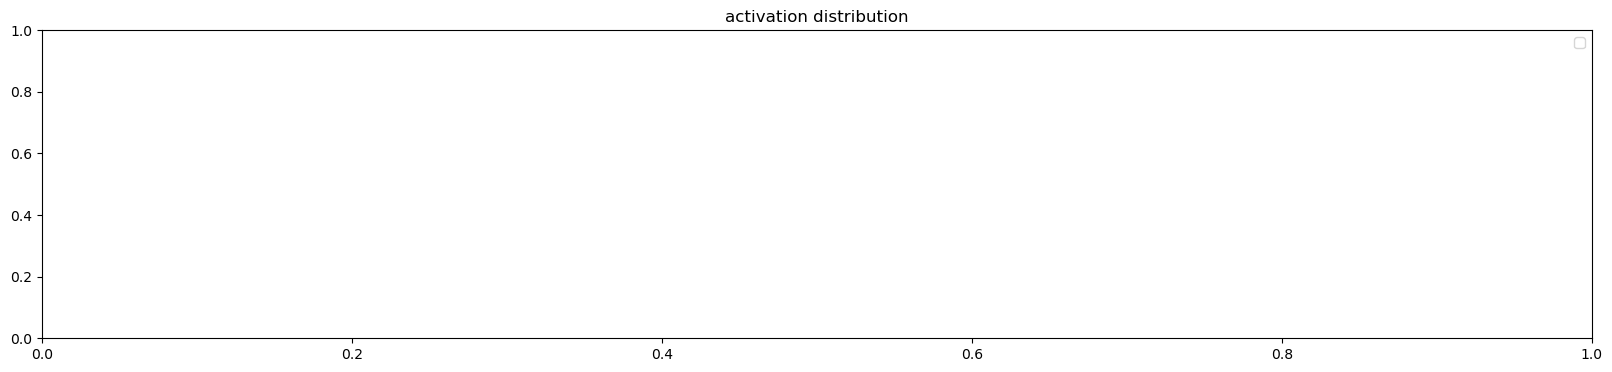

In [112]:
model.plot_activateion_destribution()

In [ ]:
context = [0] * context_lenght
out = []
while True:
    probs = model.predict(context)
    ix = torch.multinomial(probs, num_samples=1).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
        break
print(''.join(itochar(i) for i in out))    